<a href="https://colab.research.google.com/github/asegura4488/CienciaDatos/blob/main/Semana4/EstimadoresEstad%C3%ADsticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/Cursos/CursoCienciaDatos/Semana4')
!ls

Datos  EstimadoresEstadísticos.ipynb


In [9]:
Data = pd.read_csv('Datos/Ventas.csv')
Data

,Stores,2018,2019,2020
0,Amhem,133,195,132
1,Rotterdam,117,199,100
2,Amsterdam,189,177,170
3,Den Haag,152,194,125
4,Hilversum,157,123,120
5,Harderwiik,119,120,121
6,Alkmaar,118,135,148
7,Woerden,100,194,162
8,Den Bosch,136,120,136
9,Groningen,112,135,113


In [10]:
Data.keys()

Index(['Stores', '2018', '2019', '2020'], dtype='object')

<Axes: >

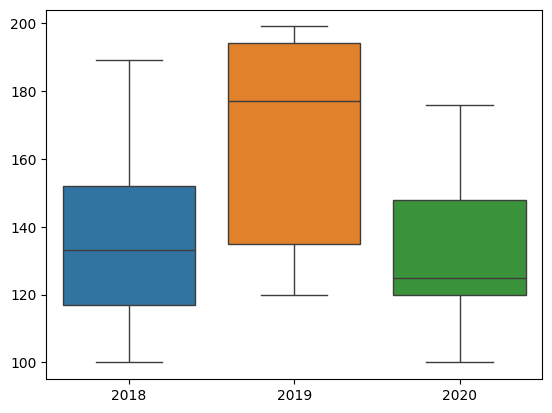

In [11]:
sns.boxplot(data=Data)

In [17]:
Columns = Data.iloc[:,1:4].values
Columns

array([[133, 195, 132],
       [117, 199, 100],
       [189, 177, 170],
       [152, 194, 125],
       [157, 123, 120],
       [119, 120, 121],
       [118, 135, 148],
       [100, 194, 162],
       [136, 120, 136],
       [112, 135, 113],
       [149, 185, 121],
       [110, 183, 107],
       [172, 156, 176]])

In [18]:
Columns.shape

(13, 3)

In [19]:
# Como calculamos los percentiles
Percentiles = np.zeros((3,5))
Percentiles

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [20]:
for i in range( Columns.shape[1] ):
  Percentiles[i] = np.percentile(Columns[:,i], [0,25,50,75,100])
Percentiles

array([[100., 117., 133., 152., 189.],
       [120., 135., 177., 194., 199.],
       [100., 120., 125., 148., 176.]])

In [25]:
# Rango intercuartilico Q3 - Q1
IQR = Percentiles[:,3] - Percentiles[:,1]
IQR
#

array([35., 59., 28.])

In [29]:
# Hay outliers?
for i in range(3):
  min_ = Percentiles[i,2] - 1.5*IQR[i]
  max_ = Percentiles[i,2] + 1.5*IQR[i]
  print(i, min_,max_)

0 80.5 185.5
1 88.5 265.5
2 83.0 167.0


In [30]:
# Histograma

12


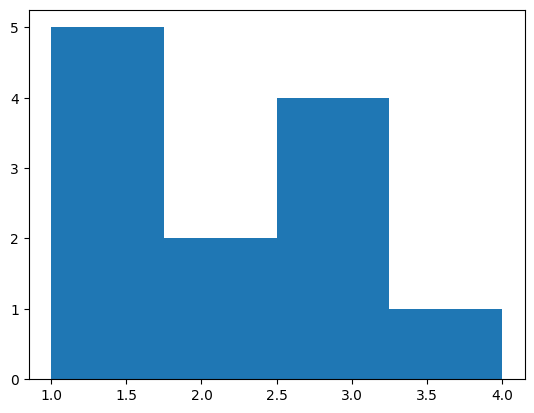

In [130]:
data = [1.,1.,1.,1.,1.,2.,2.,3.,3.,3.,3.,4.]

plt.hist(data,bins=4)
print(len(data))

In [131]:
# Min_ = El valor mas pequeño presente en la muestra
# Max_ = El equivalente
# Rango = Max_ - Min_ = 4 - 1 = 3

In [132]:
x = np.linspace(np.min(data),np.max(data)+1,int(np.max(data))+1)
x

array([1., 2., 3., 4., 5.])

In [133]:
# Puedo poner los bines como se necesite
#x = [ 1, 2, 3, 5 ]

In [134]:
# El objeto histograma
H, bins = np.histogram( data, bins=x )
# Calcular el de clase
w = np.diff(bins)
w

array([1., 1., 1., 1.])

In [135]:
H

array([5, 2, 4, 1])

In [136]:
# marca de clase
m = bins[:-1] + 0.5*w
m

array([1.5, 2.5, 3.5, 4.5])

<BarContainer object of 4 artists>

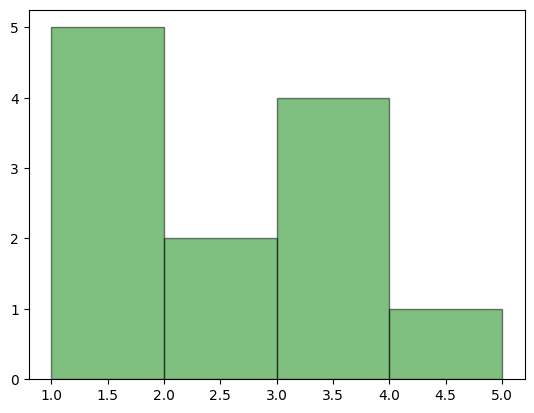

In [137]:
plt.bar(m,H,width=w,ec='k',color='g',alpha=0.5)

In [138]:
# El área bajo los rectanculos? Qué será?
# representa la cantidad de datos que tenemos
Normalizacion = np.sum(H*w)
Normalizacion

np.float64(12.0)

In [139]:
HNorm = H / Normalizacion
HNorm

array([0.41666667, 0.16666667, 0.33333333, 0.08333333])

(0.0, 0.5)

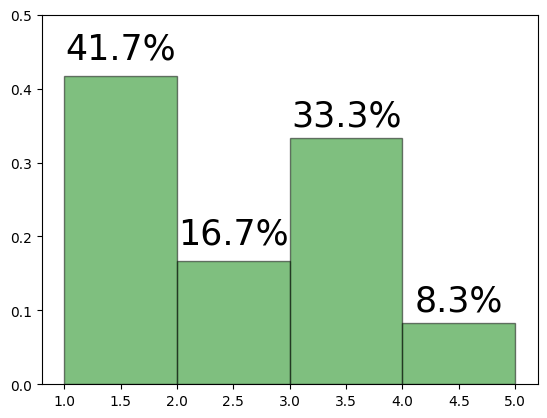

In [140]:
# Probabilidad empirica de elegir un dato al azar y sea 1: 0.41
plt.bar(m,HNorm,width=w,ec='k',color='g',alpha=0.5)

for i in range(len(m)):
  plt.text( m[i], 0.02+np.round(HNorm[i],2) , str( np.round(HNorm[i]*w[i]*100,1))+'%', ha='center', fontsize=25 )

plt.ylim(0, 0.5)

In [141]:
# Calculemos la función de distribución
Cumulative = np.zeros_like(HNorm)

for i in range(Cumulative.shape[0]):
  Cumulative[i] = np.sum(w[:i+1]*HNorm[:i+1])

Cumulative

array([0.41666667, 0.58333333, 0.91666667, 1.        ])

(0.0, 1.2)

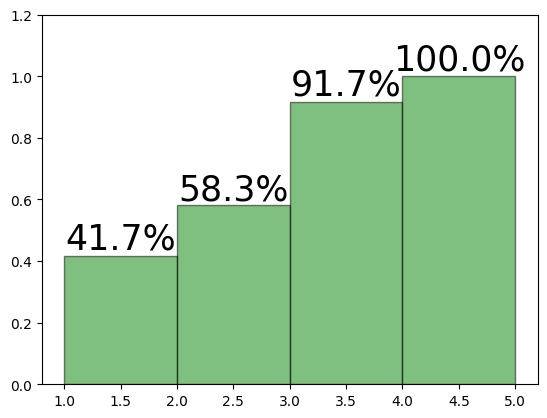

In [142]:
# Probabilidad empirica de elegir un dato al azar y sea 1: 0.41
plt.bar(m,Cumulative,width=w,ec='k',color='g',alpha=0.5)

for i in range(len(m)):
  plt.text( m[i], 0.02+np.round(Cumulative[i],2) , str( np.round(Cumulative[i]*100,1))+'%', ha='center', fontsize=25 )

plt.ylim(0, 1.2)

In [143]:
np.median(data)

np.float64(2.0)

In [164]:
data = np.random.normal(size=10000)
x = np.linspace(-4,4,50)
H, bins = np.histogram( data, bins=x )
w = np.diff(bins)
m = bins[:-1] + 0.5*w

In [165]:
HNorm = H / np.sum(H*w)

(0.0, 0.5)

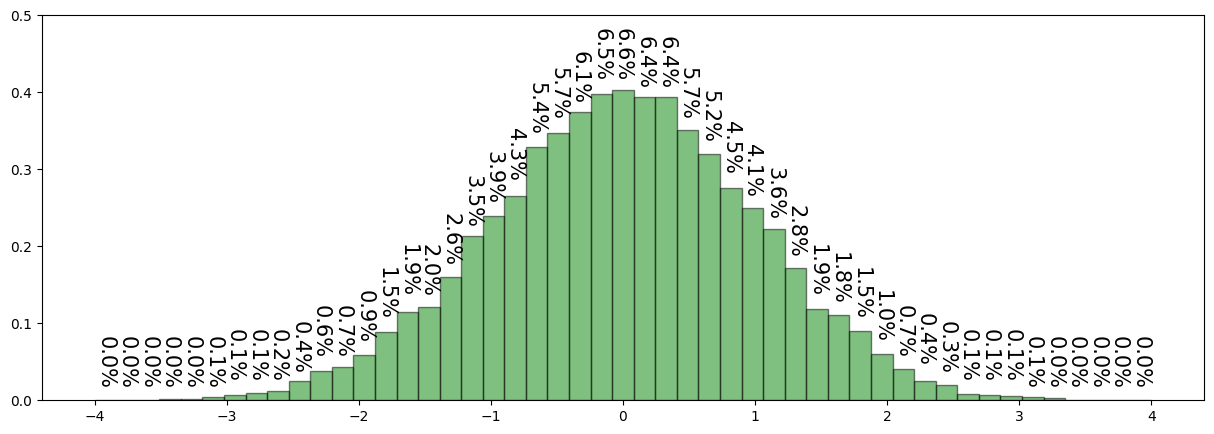

In [166]:
# Probabilidad empirica de elegir un dato al azar y sea 1: 0.41
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
ax.bar(m,HNorm,width=w,ec='k',color='g',alpha=0.5)

for i in range(len(m)):
  ax.text( m[i], 0.02+np.round(HNorm[i],2) , str( np.round(HNorm[i]*w[i]*100,1))+'%', ha='center', fontsize=15, rotation=-90 )

plt.ylim(0, 0.5)

In [167]:
Cumulative = np.zeros_like(HNorm)

for i in range(Cumulative.shape[0]):
  Cumulative[i] = np.sum(w[:i+1]*HNorm[:i+1])

#Cumulative

(0.0, 1.2)

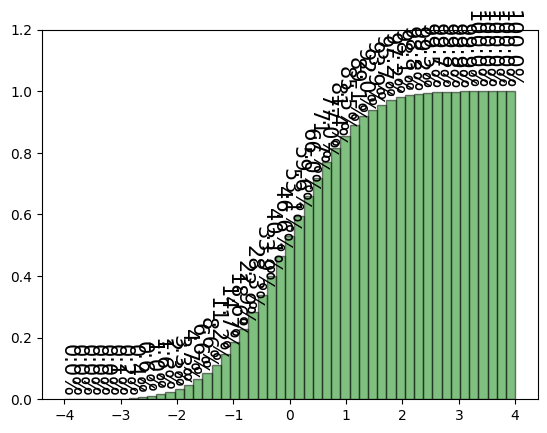

In [168]:
plt.bar(m,Cumulative,width=w,ec='k',color='g',alpha=0.5)

for i in range(len(m)):
  plt.text( m[i], 0.02+np.round(Cumulative[i],2) , str( np.round(Cumulative[i]*100,1))+'%', ha='center', fontsize=15, rotation=-90 )

plt.ylim(0, 1.2)

In [169]:
#Calculemos la probabilidad entre -1 y 1
a,b = -1, 1
# Aplicamos una mascara
mask = (bins[:-1] >= a) & (bins[1:] <= b)
mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [170]:
Prob = np.sum( HNorm[mask]*w[mask] )
Prob

np.float64(0.6287999999999998)

In [171]:
data = [1.,1.,1.,1.,1.,2.,2.,3.,3.,3.,3.,4.,5,5,5,5,6,6,6,6,6,6,6]
x = np.linspace(np.min(data),np.max(data)+1,int(np.max(data))+1)
x

array([1., 2., 3., 4., 5., 6., 7.])

In [172]:
H, bins = np.histogram( data, bins=x )
w = np.diff(bins)
m = bins[:-1] + 0.5*w
print(H)

[5 2 4 1 4 7]


<BarContainer object of 6 artists>

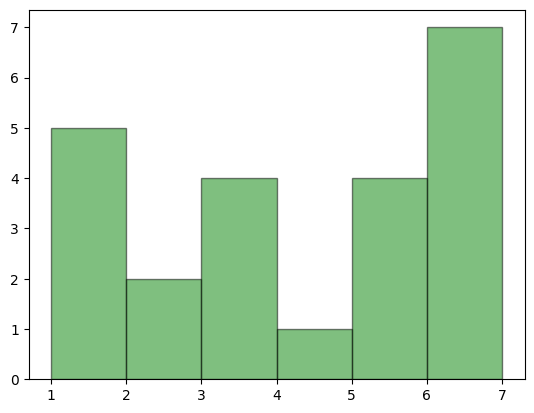

In [174]:
plt.bar(m,H,width=w,ec='k',color='g',alpha=0.5)

In [175]:
Normalizacion = np.sum( H*w )
Normalizacion

np.float64(23.0)

In [176]:
# Media muestra
#X = ( X1 + X2 + X3 ) / N
# Promedio
# X = sum ( P(X_{i}) X_{i} )

In [177]:
HNorm = H / Normalizacion
HNorm

array([0.2173913 , 0.08695652, 0.17391304, 0.04347826, 0.17391304,
       0.30434783])

In [180]:
# Las marcas de clase
X = bins[:-1]

In [182]:
mean = np.sum( X*HNorm )
mean

np.float64(3.782608695652174)

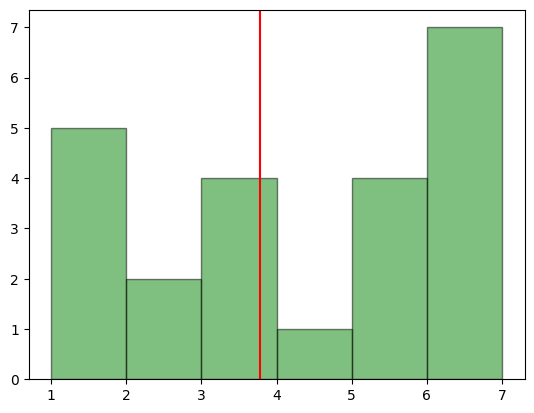

In [183]:
plt.bar(m,H,width=w,ec='k',color='g',alpha=0.5)
plt.axvline(x=mean, color='r')

In [184]:
np.mean(data)

np.float64(3.782608695652174)